In [68]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [69]:
import pandas as pd
traindf = pd.read_csv("/gdrive/My Drive/titanic/train.csv", encoding="utf-8")
testdf = pd.read_csv("/gdrive/My Drive/titanic/test.csv", encoding="utf-8")
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [70]:
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
med = traindf.median()
traindf = traindf.fillna(med)
testdf = testdf.fillna(med)
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
most = traindf["Embarked"].value_counts().idxmax()
traindf["Embarked"] = traindf["Embarked"].fillna(most)
testdf["Embarked"] = testdf["Embarked"].fillna(most)
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [73]:
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [74]:
dummy = pd.get_dummies(traindf["Embarked"])
traindf = pd.concat([traindf, dummy], axis=1)
dummy = pd.get_dummies(testdf["Embarked"])
testdf = pd.concat([testdf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,0


In [75]:
dummy = pd.get_dummies(traindf["Sex"])
traindf = pd.concat([traindf, dummy], axis=1)
dummy = pd.get_dummies(testdf["Sex"])
testdf = pd.concat([testdf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0,0,1,0


In [76]:
s = "Braund, Mr. Owen Harris"
s.split(",")[-1].split(".")[0].replace(" ", "")

'Mr'

In [77]:
def nameflow(s):
    return s.split(",")[-1].split(".")[0].replace(" ", "")
mid = traindf["Name"].apply(nameflow)
pd.crosstab(traindf["Survived"], mid)

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [78]:
def nameflow(s):
    mid =  s.split(",")[-1].split(".")[0].replace(" ", "")
    reserved = ["Mr", "Mrs", "Miss"]
    if mid in reserved:
        return mid
    else:
        return "X"
mid = traindf["Name"].apply(nameflow)
dummy = pd.get_dummies(mid)
traindf = pd.concat([traindf, dummy], axis=1)
mid = testdf["Name"].apply(nameflow)
dummy = pd.get_dummies(mid)
testdf = pd.concat([testdf, dummy], axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,female,male,Miss,Mr,Mrs,X
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,1,0,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,...,Q,0,1,0,0,1,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,0,0,1,0,1,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,0,0,1,0,1,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,0,0,1,1,0,0,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,1,0,0,1,0,0,0,1,0


In [79]:
# traindf.columns
traindf = traindf.drop(["PassengerId", "Name", "Sex", "Ticket",
                        "Cabin", "Embarked", "X"], axis=1)
traindf

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,1,0
5,0,3,28.0,0,0,8.4583,0,1,0,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,0,1,0,1,0,1,0
7,0,3,2.0,3,1,21.0750,0,0,1,0,1,0,0,0
8,1,3,27.0,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,2,14.0,1,0,30.0708,1,0,0,1,0,0,0,1


In [80]:
testdf = testdf.drop(["Name", "Sex", "Ticket",
                        "Cabin", "Embarked", "X"], axis=1)
testdf

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
5,897,3,14.0,0,0,9.2250,0,0,1,0,1,0,1,0
6,898,3,30.0,0,0,7.6292,0,1,0,1,0,1,0,0
7,899,2,26.0,1,1,29.0000,0,0,1,0,1,0,1,0
8,900,3,18.0,0,0,7.2292,1,0,0,1,0,0,0,1
9,901,3,21.0,2,0,24.1500,0,0,1,0,1,0,1,0


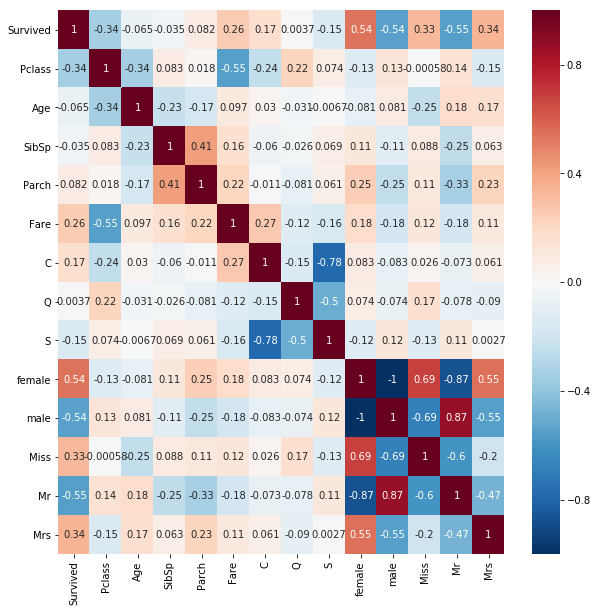

In [81]:
# Google matplotlib + colormap: https://matplotlib.org/users/colormaps.html
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(traindf.corr(), annot=True, cmap="RdBu_r")

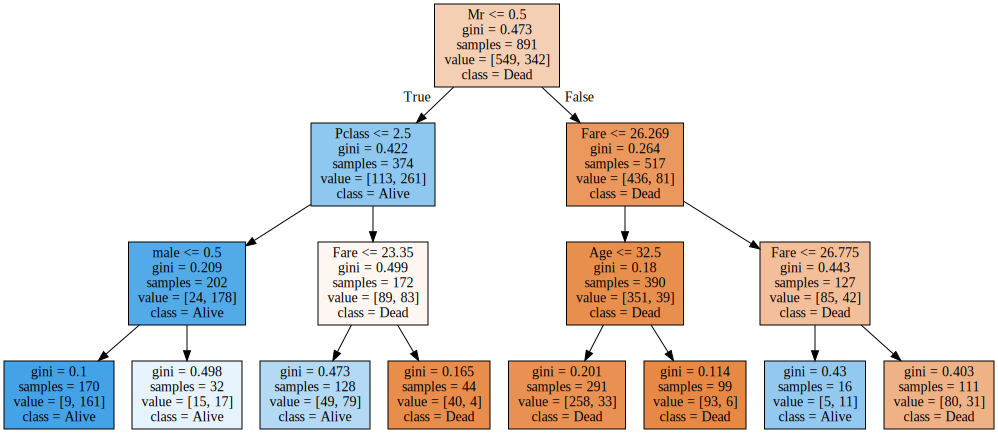

In [82]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
clf = DecisionTreeClassifier(max_depth=3)
x = traindf.drop(["Survived"], axis=1)
y = traindf["Survived"]
clf.fit(x, y)
g = export_graphviz(clf, feature_names=x.columns,
                    class_names=["Dead", "Alive"], 
                    filled=True)
graphviz.Source(g)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
clf = RandomForestClassifier(n_estimators=26,
                             max_depth=6)
score = cross_val_score(clf, x, y, cv=10)
print(score)
print(np.average(score))

[0.8        0.83333333 0.7752809  0.8988764  0.84269663 0.79775281
 0.80898876 0.7752809  0.86516854 0.85227273]
0.8249651004426285


In [87]:
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":range(10, 30),
    "max_depth":range(5, 10)
}
clf = RandomForestClassifier()
search = GridSearchCV(clf, params, n_jobs=4, cv=10)
search.fit(x, y)
print(search.best_score_)
print(search.best_params_)

0.8462401795735129
{'max_depth': 9, 'n_estimators': 14}


In [90]:
clf = RandomForestClassifier(max_depth=6, n_estimators=29)
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=29, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
from google.colab import files

pre = clf.predict(testdf.drop(["PassengerId"], axis=1))
result = pd.DataFrame()
result["PassengerId"] = testdf["PassengerId"]
result["Survived"] = pre
result.to_csv("titanic.csv", 
              encoding="utf-8",
              index=False)
files.download('titanic.csv')
result

In [0]:
important = pd.DataFrame()
important["name"] = x.columns
important["weight"] = clf.feature_importances_
important

In [96]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 20)
}
search = GridSearchCV(clf, params, n_jobs=4, cv=10)
search.fit(x, y)
print(search.best_score_)
print(search.best_params_)

0.7384960718294051
{'n_neighbors': 7}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)
pd.DataFrame(x_scale)

In [100]:

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_scale, y)
x_test_scale = scaler.transform(testdf.drop(["PassengerId"], axis=1))
pre = clf.predict(x_test_scale)
result = pd.DataFrame()
result["PassengerId"] = testdf["PassengerId"]
result["Survived"] = pre
result.to_csv("titanic.csv", 
              encoding="utf-8",
              index=False)
files.download('titanic.csv')
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [106]:
traindf = pd.read_csv("/gdrive/My Drive/titanic/train.csv", encoding="utf-8")
traindf = traindf.fillna(med)
traindf["Embarked"] = traindf["Embarked"].fillna(most)
def nameflow(s):
    return s.split(",")[-1].split(".")[0].replace(" ", "")
traindf["Name"] = traindf["Name"].apply(nameflow)
traindf = traindf.drop(["Ticket", "Cabin"], axis=1)
traindf.to_csv("/gdrive/My Drive/titanic/draw.csv",
               encoding="utf-8",
               index=False)
traindf


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Mr,male,22.0,1,0,7.2500,S
1,2,1,1,Mrs,female,38.0,1,0,71.2833,C
2,3,1,3,Miss,female,26.0,0,0,7.9250,S
3,4,1,1,Mrs,female,35.0,1,0,53.1000,S
4,5,0,3,Mr,male,35.0,0,0,8.0500,S
5,6,0,3,Mr,male,28.0,0,0,8.4583,Q
6,7,0,1,Mr,male,54.0,0,0,51.8625,S
7,8,0,3,Master,male,2.0,3,1,21.0750,S
8,9,1,3,Mrs,female,27.0,0,2,11.1333,S
9,10,1,2,Mrs,female,14.0,1,0,30.0708,C
